
loading the data ...

Set1 nfiles: 6000 ,  Set2 nfiles: 3140 ,  Set3 nfiles: 3804

done ...

Device:  cuda
==================== Start training D2D3 ==================== 
Training Process is running: Epoch [1/2], Total Loss: 0.8387582475940386             | variable_of_interest loss: 0.7881012136737505 | dataset_membership loss: 0.5599292874336242             | dec_h loss: 0.584771296630303 
Training Process is running: Epoch [2/2], Total Loss: 0.0611803929011027             | variable_of_interest loss: 0.3313013290365537 | dataset_membership loss: 0.5292799919843674             | dec_h loss: 0.24445205616454282 
saving the model ...

==================== Start validating for training set D2D3 ==================== 
              precision    recall  f1-score   support

         0.0       0.99      0.61      0.75      3072
         1.0       0.72      0.99      0.83      3072

    accuracy                           0.80      6144
   macro avg       0.85      0.80      0.79      6144
wei

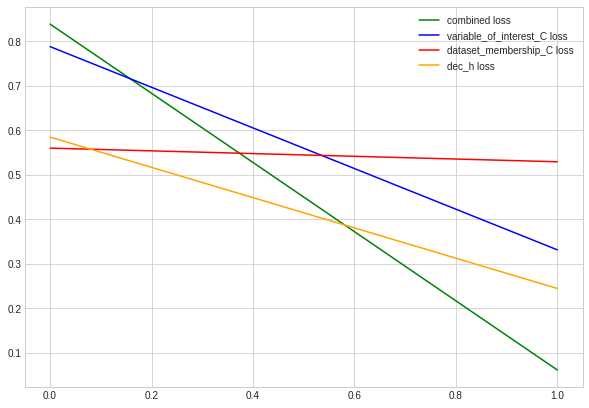

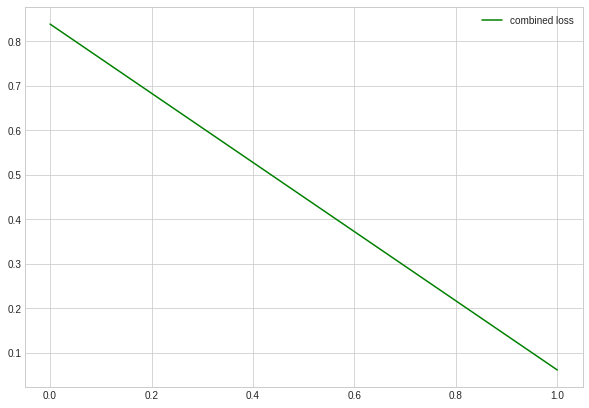

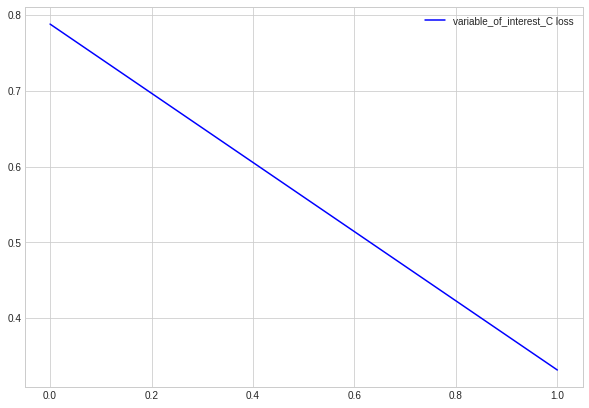

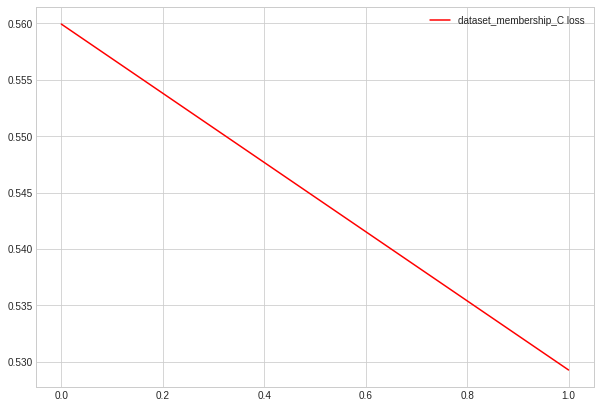

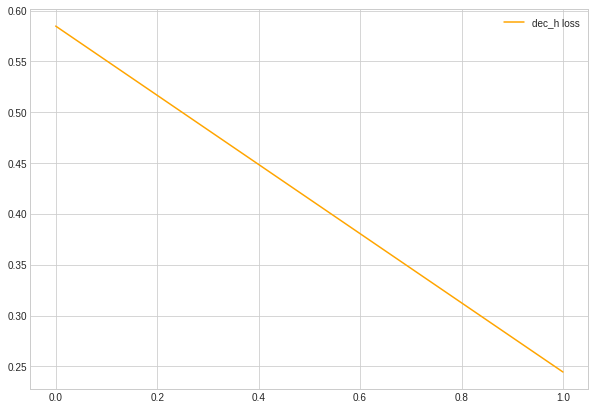

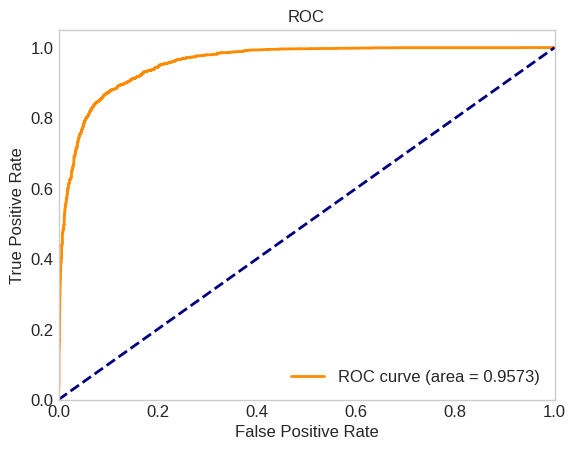

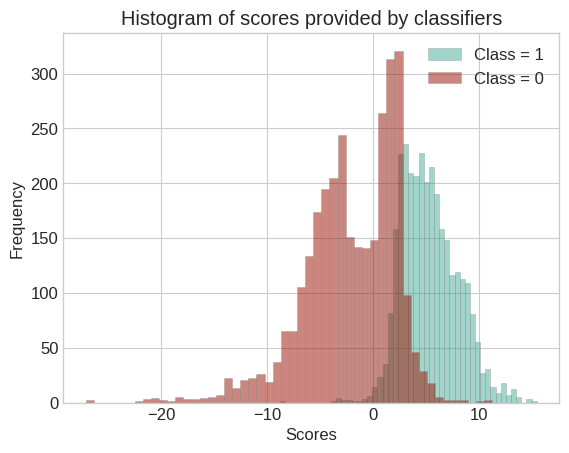

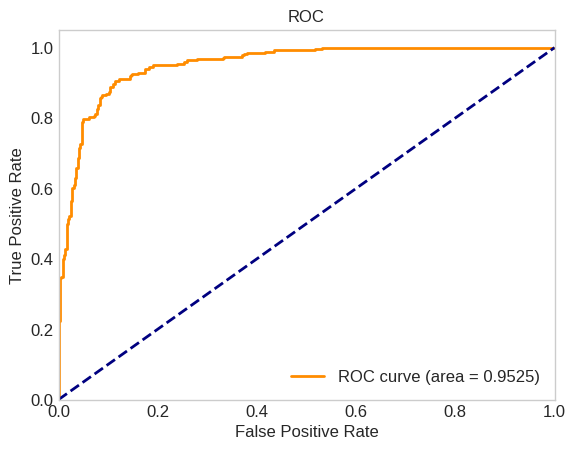

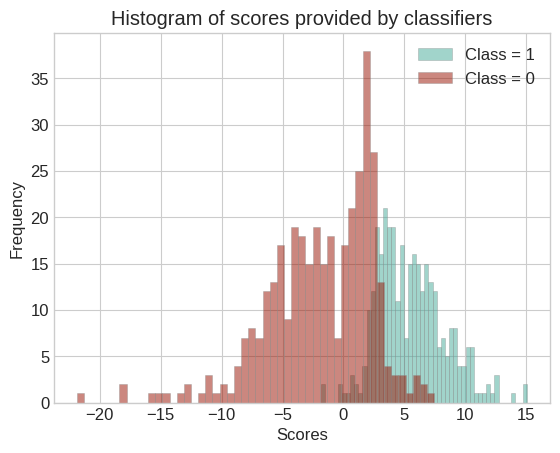

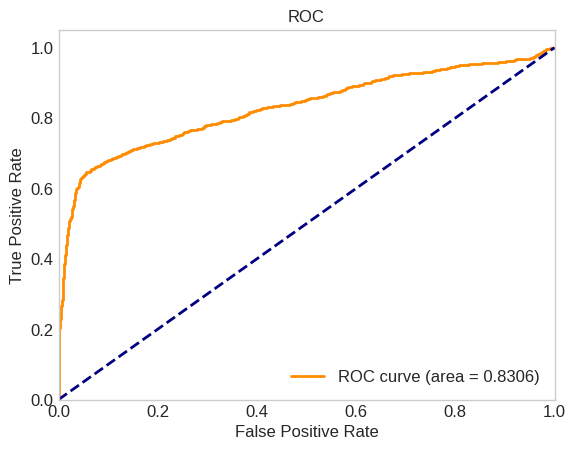

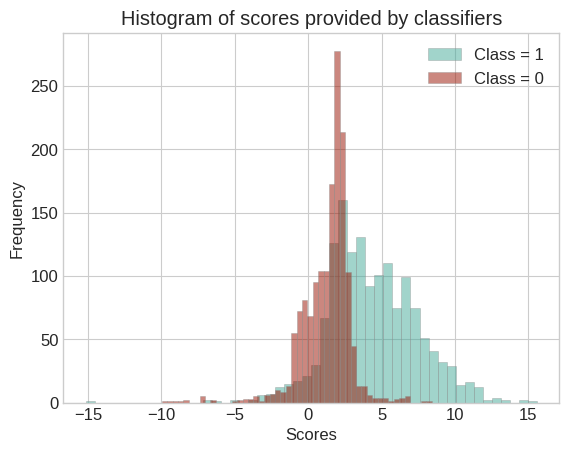

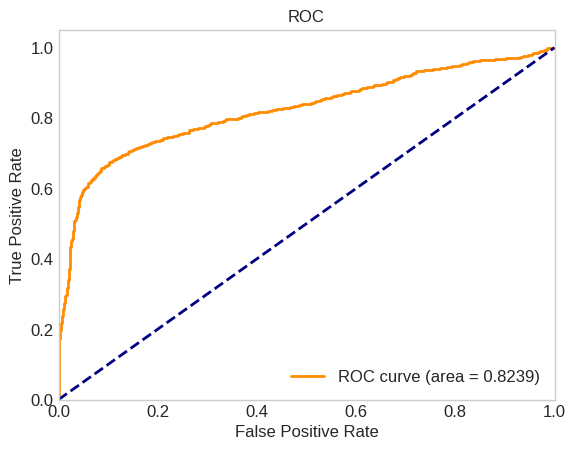

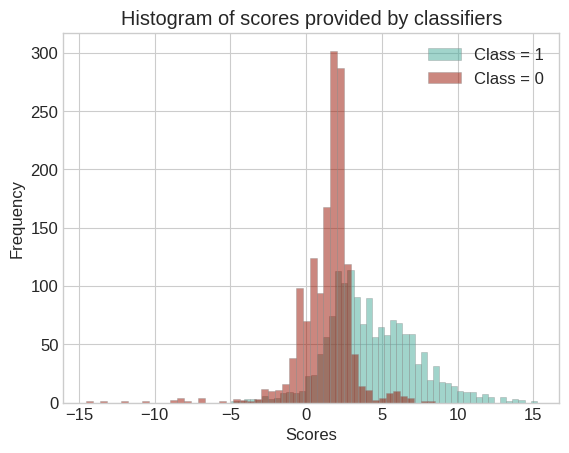

In [1]:
import time
import argparse
from train import main
from utils import *

# Create a class to simulate command-line arguments
class ArgumentParser(argparse.ArgumentParser):
    def __init__(self, *args, **kwargs):
        super(ArgumentParser, self).__init__(*args, **kwargs)
        self.args = None

    def parse_args(self, args=None, namespace=None):
        if self.args is None:
            return super(ArgumentParser, self).parse_args(args=args, namespace=namespace)
        else:
            return self.parse_known_args(self.args, namespace)
        
        
def parse_arguments_from_list(args_list):
    parser = ArgumentParser(description='PyTorch Model Training')
    parser.add_argument('--data_dir', type=str, default='../data/', help='Path to the data directory')
    parser.add_argument('--batch_size', type=int, default=32, help='Input batch size for training')
    parser.add_argument('--num_epochs', type=int, default=10, help='Number of epochs to train')
    parser.add_argument('--im_size', type=int, default=32, help='Size of images')
    parser.add_argument('--learning_rate', type=float, default=0.001, help='Learning rate')
    parser.add_argument('--cuda', action='store_true', help='Use CUDA for training')
    parser.add_argument('--seed', type=int, default=30, help='Random seed for reproducibility')
    parser.add_argument('--display', action='store_true', help='Display the plots')
    parser.add_argument('--cross_dataset', action='store_true', help='Cross dataset or Within dataset?')
    parser.add_argument('--setup', type=str, default='Baseline1', help='Baseline1/Baseline2/SupCon')
    parser.add_argument('--exp', type=str, default='D1a', help='D1a/D1b/D2a/D2b/D3a/D3b/D2D3/D1D3/D1D2')
    return parser.parse_args(args_list)


if __name__ == '__main__':
    # Define your desired argument values
    args_list = ['--data_dir', '../data/', 
                 '--batch_size', '256', 
                 '--num_epochs', '2',
                 '--im_size', '128',
                 '--learning_rate', '0.01',
                 '--cuda',
                 '--setup', 'Baseline2',
                 '--exp', 'D2D3', 
                 '--cross_dataset'
                ]
    args = parse_arguments_from_list(args_list)
    
    start = time.time()
    main(args)
    end = time.time()
    days, hours, minutes, seconds = getTime(end-start)
    print(f"\n{int(days)} day(s) {int(hours)} hour(s) {int(minutes)} minute(s) {int(seconds)} second(s)")
